# Image sample

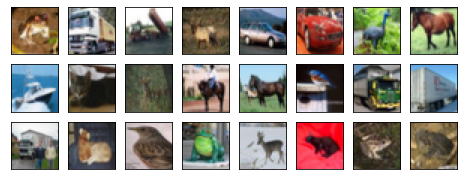

(50000, 32, 32, 3)

In [7]:
from data_loader import *
from utils import display_sample_img
x_train, _, _, _ = cifar10_loader(True)
display_sample_img(x_train, (3,8), True)
x_train.shape
# 이미지 -1~1 제너레이터가 -1~1까지의 이미지를 생성해야한다.

# GAN
* BuildModel(img_shape, Z_dimention, label_dimention)

## Generator, Discriminator

In [8]:
from model import BuildModel
IMG_SHAPE = (32,32,3)
Z_DIM = 128
builder = BuildModel(IMG_SHAPE, Z_DIM)
gene = builder.build_gene(last_activation='tanh') # tanh : -1 ~ 1 아웃풋  sigmoid: 0~1 아웃풋
disc = builder.build_disc()
gene.summary()
print()
disc.summary()

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 noise (InputLayer)          [(None, 128)]             0         
                                                                 
 dense_6 (Dense)             (None, 8192)              1056768   
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 batch_normalization_4 (Batc  (None, 8, 8, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 16, 16, 64)       204864    
 ranspose)                                                       
                                                                 
 batch_normalization_5 (Batc  (None, 16, 16, 64)       25

## GAN Fit

Model: "GAN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128)]             0         
                                                                 
 Generator (Functional)      (None, 32, 32, 3)         1267203   
                                                                 
 Discriminator (Functional)  (None, 1)                 218113    
                                                                 
Total params: 1,485,316
Trainable params: 1,266,819
Non-trainable params: 218,497
_________________________________________________________________
* epoch: 1, d_loss: 346.557667, g_loss: 4979.485249
1/1 [==============================] - 0s 65ms/step


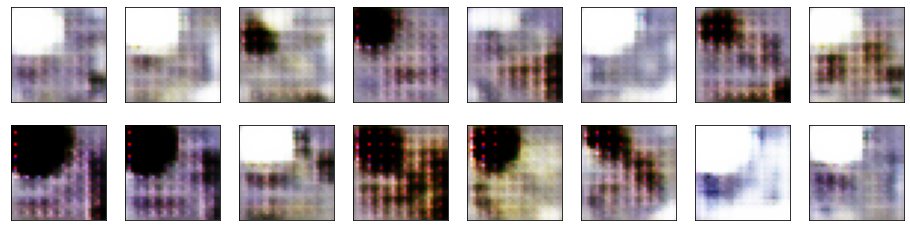

* epoch: 2, d_loss: 272.168807, g_loss: 6118.425172
1/1 [==============================] - 0s 11ms/step


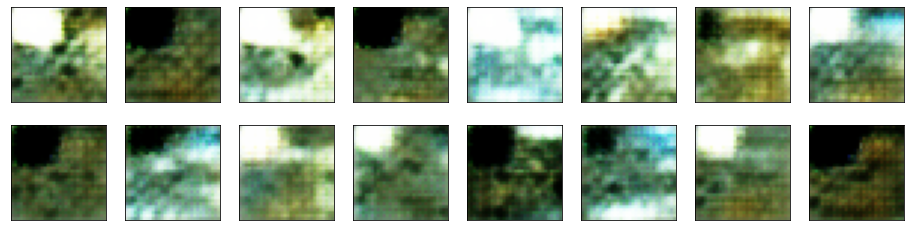

* epoch: 3, d_loss: 357.221671, g_loss: 5546.220006
1/1 [==============================] - 0s 12ms/step


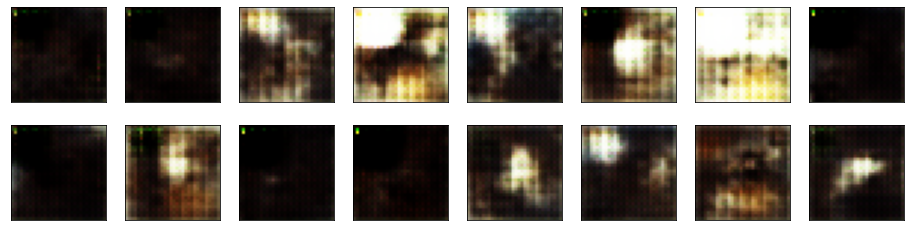

* epoch: 4, d_loss: 302.972864, g_loss: 5827.918977
1/1 [==============================] - 0s 11ms/step


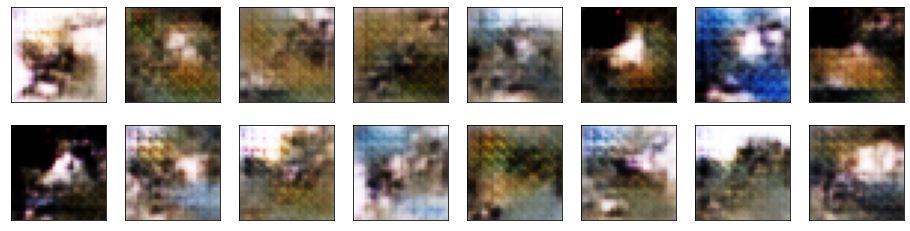

* epoch: 5, d_loss: 323.067993, g_loss: 5403.168273
1/1 [==============================] - 0s 12ms/step


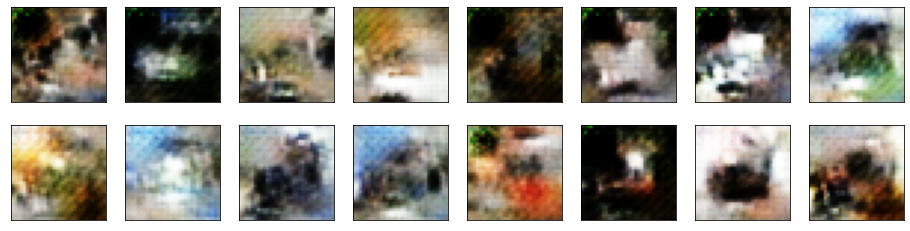

In [9]:
from gan import GAN
model = GAN(gene, disc, IMG_SHAPE, Z_DIM)
model.Compile()
model.gan.summary()
model.fit(x_train,  epochs= 5, standard=True)

## CGAN

* BuildModel(img_shape, Z_dimention, label_dimention)

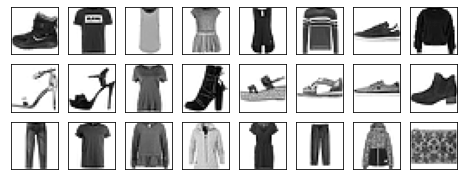

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28), (10000, 10))

In [4]:
from data_loader import *
from utils import display_sample_img

IMG_SHAPE = (28,28,1)
NOISE_DIM = 128
LABEL_DIM = 10

x_train, y_train, x_test, y_test = fmnist_loader(True, True)
display_sample_img(x_train, (3,8), True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# x_train, _, _, _ = mnist_loader(True, True)
# display_sample_img(x_train, (3,8), True)
# x_train.shape

In [5]:
from model import BuildModel
builder = BuildModel(IMG_SHAPE, NOISE_DIM, label_dim=10)
gene = builder.build_gene(last_activation='tanh') # tanh : -1 ~ 1 아웃풋  sigmoid: 0~1 아웃풋
disc = builder.build_disc()
gene.summary()
disc.summary()

Model: "C_Generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 noise (InputLayer)             [(None, 128)]        0           []                               
                                                                                                  
 condition (InputLayer)         [(None, 10)]         0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 138)          0           ['noise[0][0]',                  
                                                                  'condition[0][0]']              
                                                                                                  
 dense_3 (Dense)                (None, 6272)         871808      ['concatenate[0][0]']  

Model: "GAN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 C_Generator (Functional)       (None, 28, 28, 1)    1079041     ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 C_Discriminator (Functional)   (None, 1)            246913      ['C_Generator[0][0]',          

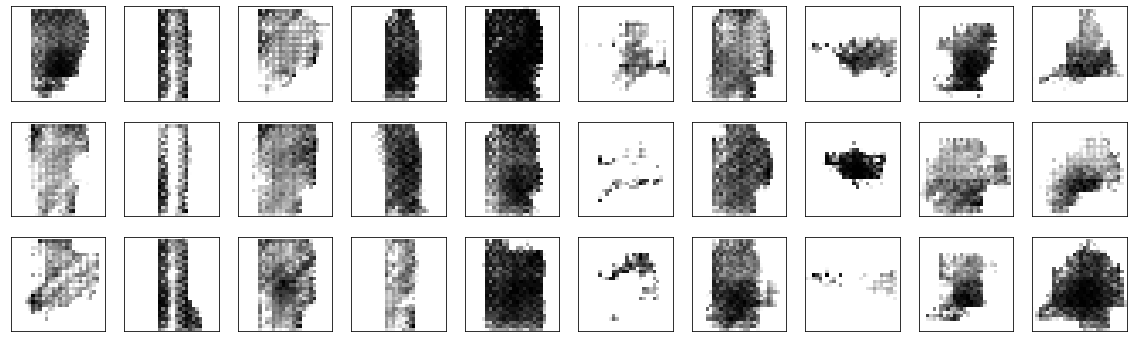

* epoch: 2, d_loss: 620.883525, g_loss: 4328.143507
1/1 [==============================] - 0s 15ms/step


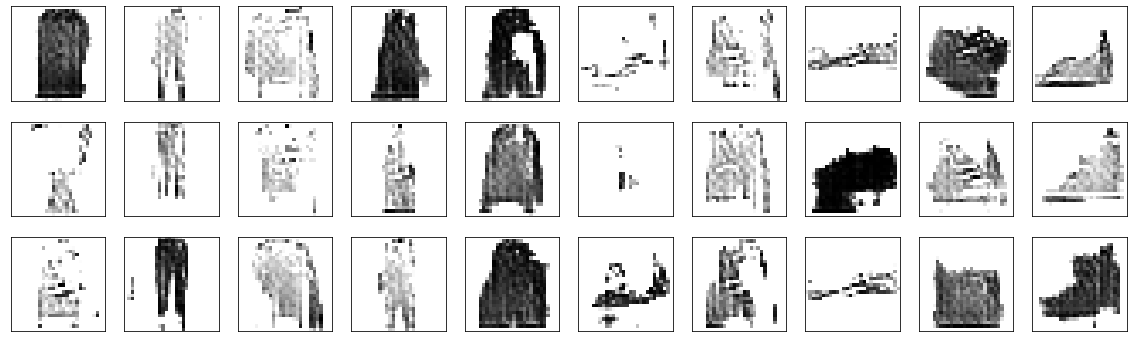

* epoch: 3, d_loss: 726.258355, g_loss: 3547.071958
1/1 [==============================] - 0s 13ms/step


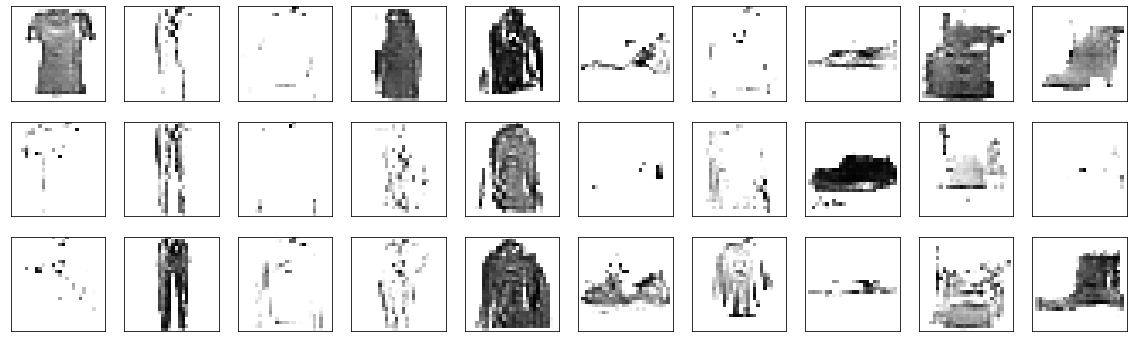

* epoch: 4, d_loss: 849.617923, g_loss: 2976.119488
1/1 [==============================] - 0s 13ms/step


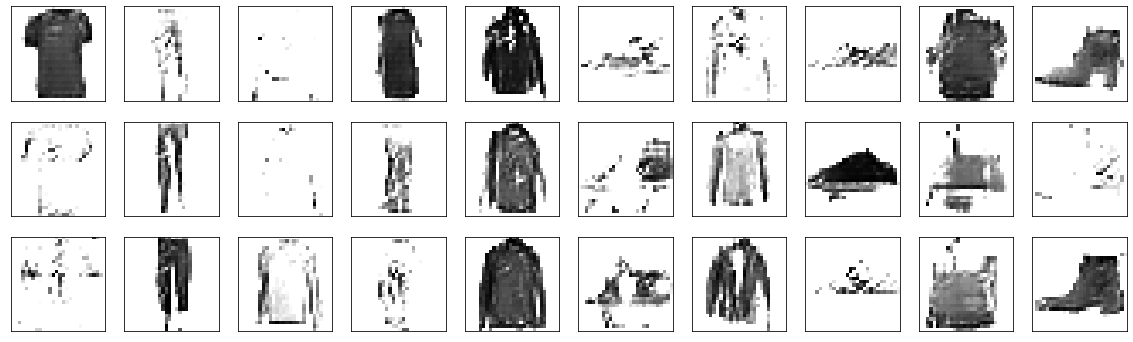

* epoch: 5, d_loss: 900.886887, g_loss: 2795.743855
1/1 [==============================] - 0s 13ms/step


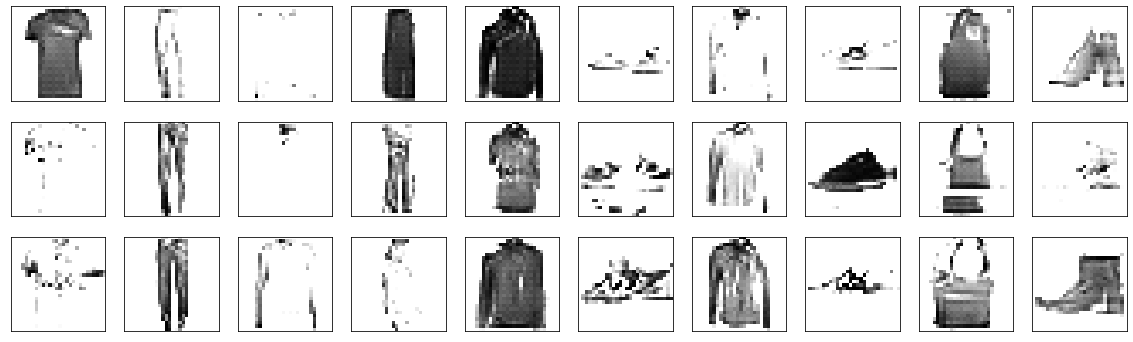

In [6]:
from gan import GAN
model = GAN(gene, disc, IMG_SHAPE, NOISE_DIM,LABEL_DIM)
model.Compile()
model.gan.summary()
model.fit(x_train,y_train,  epochs= 5)